<AxesSubplot:xlabel='Kommune'>

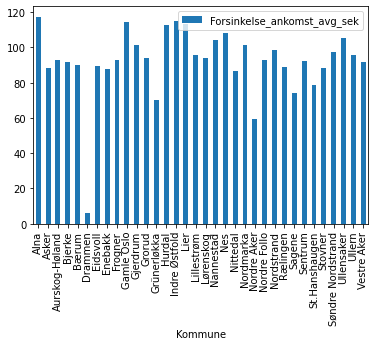

In [8]:
import pandas as panda 
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
#Leser inn csv filen og setter opp en delimiter så den blir lesbar
dataframe = panda.read_csv('Ruter_data.csv',delimiter=';')
timedeltaplanlagt = panda.to_timedelta(dataframe['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])
timedeltafaktisk = panda.to_timedelta(dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
#Her lager jeg en ny kolonne hvor jeg har kalkulert differansen mellom faktisk og planlagt ankomst i sekunder
dataframe['Differanse_ankomst'] = panda.to_timedelta(timedeltafaktisk - timedeltaplanlagt) / np.timedelta64(1,'s')
#Her finner jeg alle null verdiene i tabellen
nullvalues = dataframe[dataframe.isna().any(axis=1)]
#Her dropper jeg alle rader som inneholder manglende verdier, i dette tilfellet manglet vi klokkeslett for faktisk ankomst
dataframe = dataframe.dropna()
nullvalues = dataframe[dataframe.isna().any(axis=1)]
dataframe.Differanse_ankomst
tidsbruklinjetype = dataframe[['Kommune','Differanse_ankomst']]
threshold_max = tidsbruklinjetype['Differanse_ankomst'].quantile(0.90)
threshold_min = tidsbruklinjetype['Differanse_ankomst'].quantile(0.10)
new_tidsbruklinjetype=tidsbruklinjetype[(tidsbruklinjetype['Differanse_ankomst']<threshold_max)&(tidsbruklinjetype['Differanse_ankomst']>threshold_min)]
tidsbruklinjetype_gruppert = new_tidsbruklinjetype.groupby('Kommune').mean()
tidsbruklinjetype_gruppert.rename(columns={'Differanse_ankomst' : 'Forsinkelse_ankomst_avg_sek'}, inplace=True)
tidsbruklinjetype_gruppert.plot.bar()